# Read the data and preprocess it

In [2]:
import pandas as pd 

cols = ["Index", "Entity", "Sentiments", "Text"]

df_train=pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv", header=None, names=cols)
df_val=pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv", header=None, names=cols)

In [3]:
df_train.head()

,Index,Entity,Sentiments,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df_val.head()

,Index,Entity,Sentiments,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
df_val.isnull().sum()

Index         0
Entity        0
Sentiments    0
Text          0
dtype: int64

In [6]:
df_train.isnull().sum()

Index           0
Entity          0
Sentiments      0
Text          686
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Index       74682 non-null  int64 
 1   Entity      74682 non-null  object
 2   Sentiments  74682 non-null  object
 3   Text        73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment_counts = df_train['Sentiments'].value_counts()

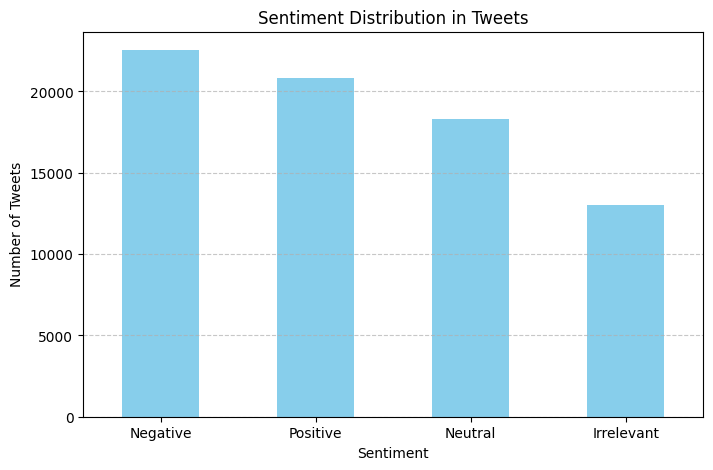

In [9]:

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['skyblue'])

plt.title("Sentiment Distribution in Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

In [10]:
df_train.duplicated().sum()

2700

In [11]:
df_train.dropna(inplace=True)
df_train.drop_duplicates(inplace=True)

# Clean the Text data fo better results

In [1]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 6.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 10.7 MB/s eta 0:00:00


In [12]:
import re
import contractions


def clean_tweet_text(text):

    text = contractions.fix(text)

    text = text.lower()
    
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    text = re.sub(r'@\w+', '', text)
    
    text = re.sub(r'#(\w+)', r'\1', text)
    
    text = re.sub(r'\d+', '', text)
    
    text = re.sub(r'[^\w\s]', '', text)
    
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

df_train['Text'] = df_train['Text'].apply(clean_tweet_text)
df_val['Text'] = df_val['Text'].apply(clean_tweet_text)

In [13]:
df_train['Text']

0        i am getting on borderlands and i will murder ...
1        i am coming to the borders and i will kill you...
2        i am getting on borderlands and i will kill yo...
3        i am coming on borderlands and i will murder y...
4        i am getting on borderlands and i will murder ...
                               ...                        
74677    just realized that the windows partition of my...
74678    just realized that my mac window partition is ...
74679    just realized the windows partition of my mac ...
74680    just realized between the windows partition of...
74681    just like the windows partition of my mac is l...
Name: Text, Length: 71656, dtype: object

In [14]:
import nltk
nltk.download('punkt')      
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(lemmatized_tokens)

df_train['Text'] = df_train['Text'].apply(lemmatize_text)
df_val['Text'] = df_val['Text'].apply(lemmatize_text)

In [16]:
df_train['Text']

0        i am getting on borderland and i will murder y...
1        i am coming to the border and i will kill you all
2        i am getting on borderland and i will kill you...
3        i am coming on borderland and i will murder yo...
4        i am getting on borderland and i will murder y...
                               ...                        
74677    just realized that the window partition of my ...
74678    just realized that my mac window partition is ...
74679    just realized the window partition of my mac i...
74680    just realized between the window partition of ...
74681    just like the window partition of my mac is li...
Name: Text, Length: 71656, dtype: object

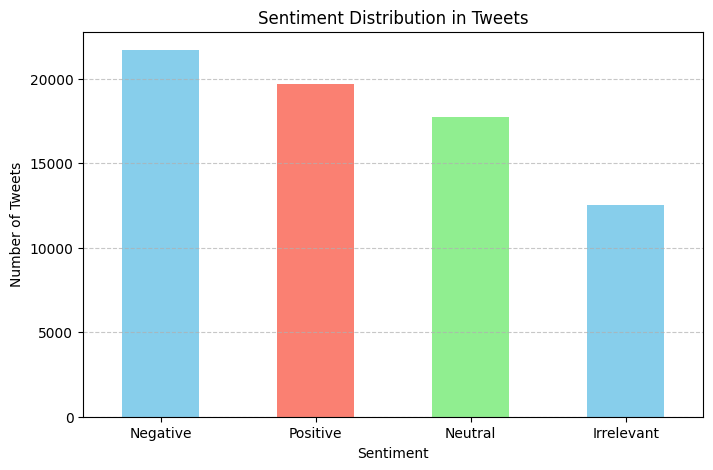

In [17]:
sentiment_counts = df_train['Sentiments'].value_counts()


plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])

plt.title("Sentiment Distribution in Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

# Encode Sentiments coulmn prepare for trainnig and val data

In [18]:
from sklearn.preprocessing import LabelEncoder

def encode_sentiments(df_train, df_val, column='Sentiments'):

    le = LabelEncoder()
    
    # Fit on training data only
    df_train[column] = le.fit_transform(df_train[column])
    
    # Transform validation data using same encoder
    df_val[column] = le.transform(df_val[column])
    
    # Mapping dictionary
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    
    return df_train, df_val, mapping, le

df_train, df_val, sentiment_mapping, le = encode_sentiments(df_train, df_val)

print("Mapping:", sentiment_mapping)
print(df_train[['Sentiments']].head())
print(df_val[['Sentiments']].head())

Mapping: {'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3}
   Sentiments
0           3
1           3
2           3
3           3
4           3
   Sentiments
0           0
1           2
2           1
3           1
4           2


In [19]:
X_train = df_train['Text']
y_train = df_train['Sentiments']
X_val = df_val['Text']
y_val = df_val['Sentiments']

# Tokenize the data preparing for training

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer setup
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Padding
max_len = max(len(seq) for seq in X_train_seq)  # or choose fixed length like 50-100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print("Vocab size:", vocab_size)

2025-08-13 03:00:21.933466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755054022.114669      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755054022.168496      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Vocab size: 34766


In [26]:
print(max_len)

167


# Save our tokenizer

In [21]:
import pickle

# Save tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Identify LSTM Arch

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 100

from tensorflow.keras.layers import Bidirectional
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(sentiment_mapping), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Build the model explicitly
model.build(input_shape=(None, max_len))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 167, 100)       │     3,476,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,727,804 (14.22 MB)

 Trainable params: 3,727,804 (14.22 MB)

 Non-trainable params: 0 (0.00 B)

# Lets train !

In [27]:
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 762s 680ms/step - accuracy: 0.6078 - loss: 0.9850 - val_accuracy: 0.8650 - val_loss: 0.4173
Epoch 2/10
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 755s 674ms/step - accuracy: 0.8266 - loss: 0.4881 - val_accuracy: 0.9160 - val_loss: 0.2637
Epoch 3/10
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 752s 672ms/step - accuracy: 0.8828 - loss: 0.3250 - val_accuracy: 0.9280 - val_loss: 0.2193
Epoch 4/10
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 754s 674ms/step - accuracy: 0.9062 - loss: 0.2552 - val_accuracy: 0.9370 - val_loss: 0.2041
Epoch 5/10
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 752s 671ms/step - accuracy: 0.9189 - loss: 0.2156 - val_accuracy: 0.9500 - val_loss: 0.2001
Epoch 6/10
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 757s 676ms/step - accuracy: 0.9322 - loss: 0.1780 - val_accuracy: 0.9530 - val_loss: 0.1931
Epoch 7/10
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 753s 672ms/step - accuracy: 0.9372 - loss: 0.1654 - val_accuracy: 0.9460 - val_loss: 0.2351
Epoch 8/10
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 753s 672ms/step - ac

In [29]:
model.save("sentiment_lstm.h5")   # HDF5 format

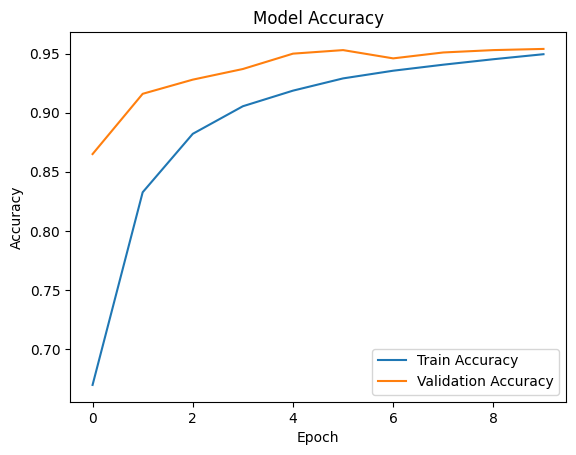

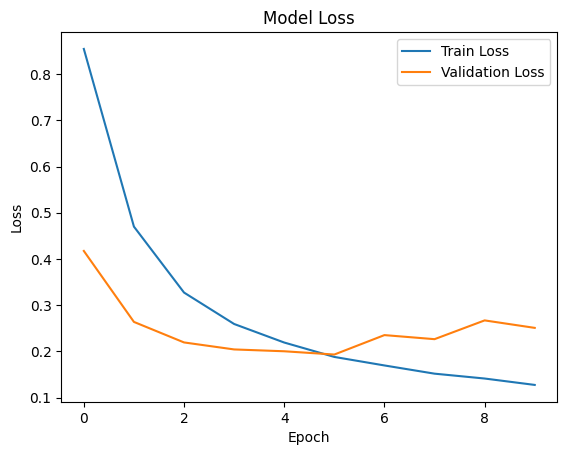

In [28]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Load our files for testing

In [30]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load tokenizer
with open('/kaggle/working/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Load trained model
model = load_model("/kaggle/working/sentiment_lstm.h5")

In [39]:
# Get input from user
user_text = input("Enter your text to analyze sentiment: ")

# Convert to sequence (still needs to be in a list for processing)
new_seq = tokenizer.texts_to_sequences([user_text])  # Note: wrapped in a list

# Pad sequences (same max_len as training)
new_pad = pad_sequences(new_seq, maxlen=max_len, padding='post', truncating='post')

# Now you can use new_pad for prediction

Enter your text to analyze sentiment:  i hate you


In [40]:
prediction = model.predict(new_pad)
pred_label = prediction.argmax()  # Get the predicted class index

# Reverse dictionary: int → string
reverse_mapping = {v: k for k, v in sentiment_mapping.items()}

# Display result
print(f"\nText: {user_text} → Sentiment: {reverse_mapping[pred_label]}")
print(f"Confidence: {prediction[0][pred_label]:.2%}")  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step

Text: i hate you → Sentiment: Negative
Confidence: 96.12%
